In [8]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score


# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV


# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

titanic_data = pd.read_csv('data/titanic.csv')
# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [9]:
# Load in the titanic data set.
df = pd.read_csv('data/titanic.csv')
df.head()
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


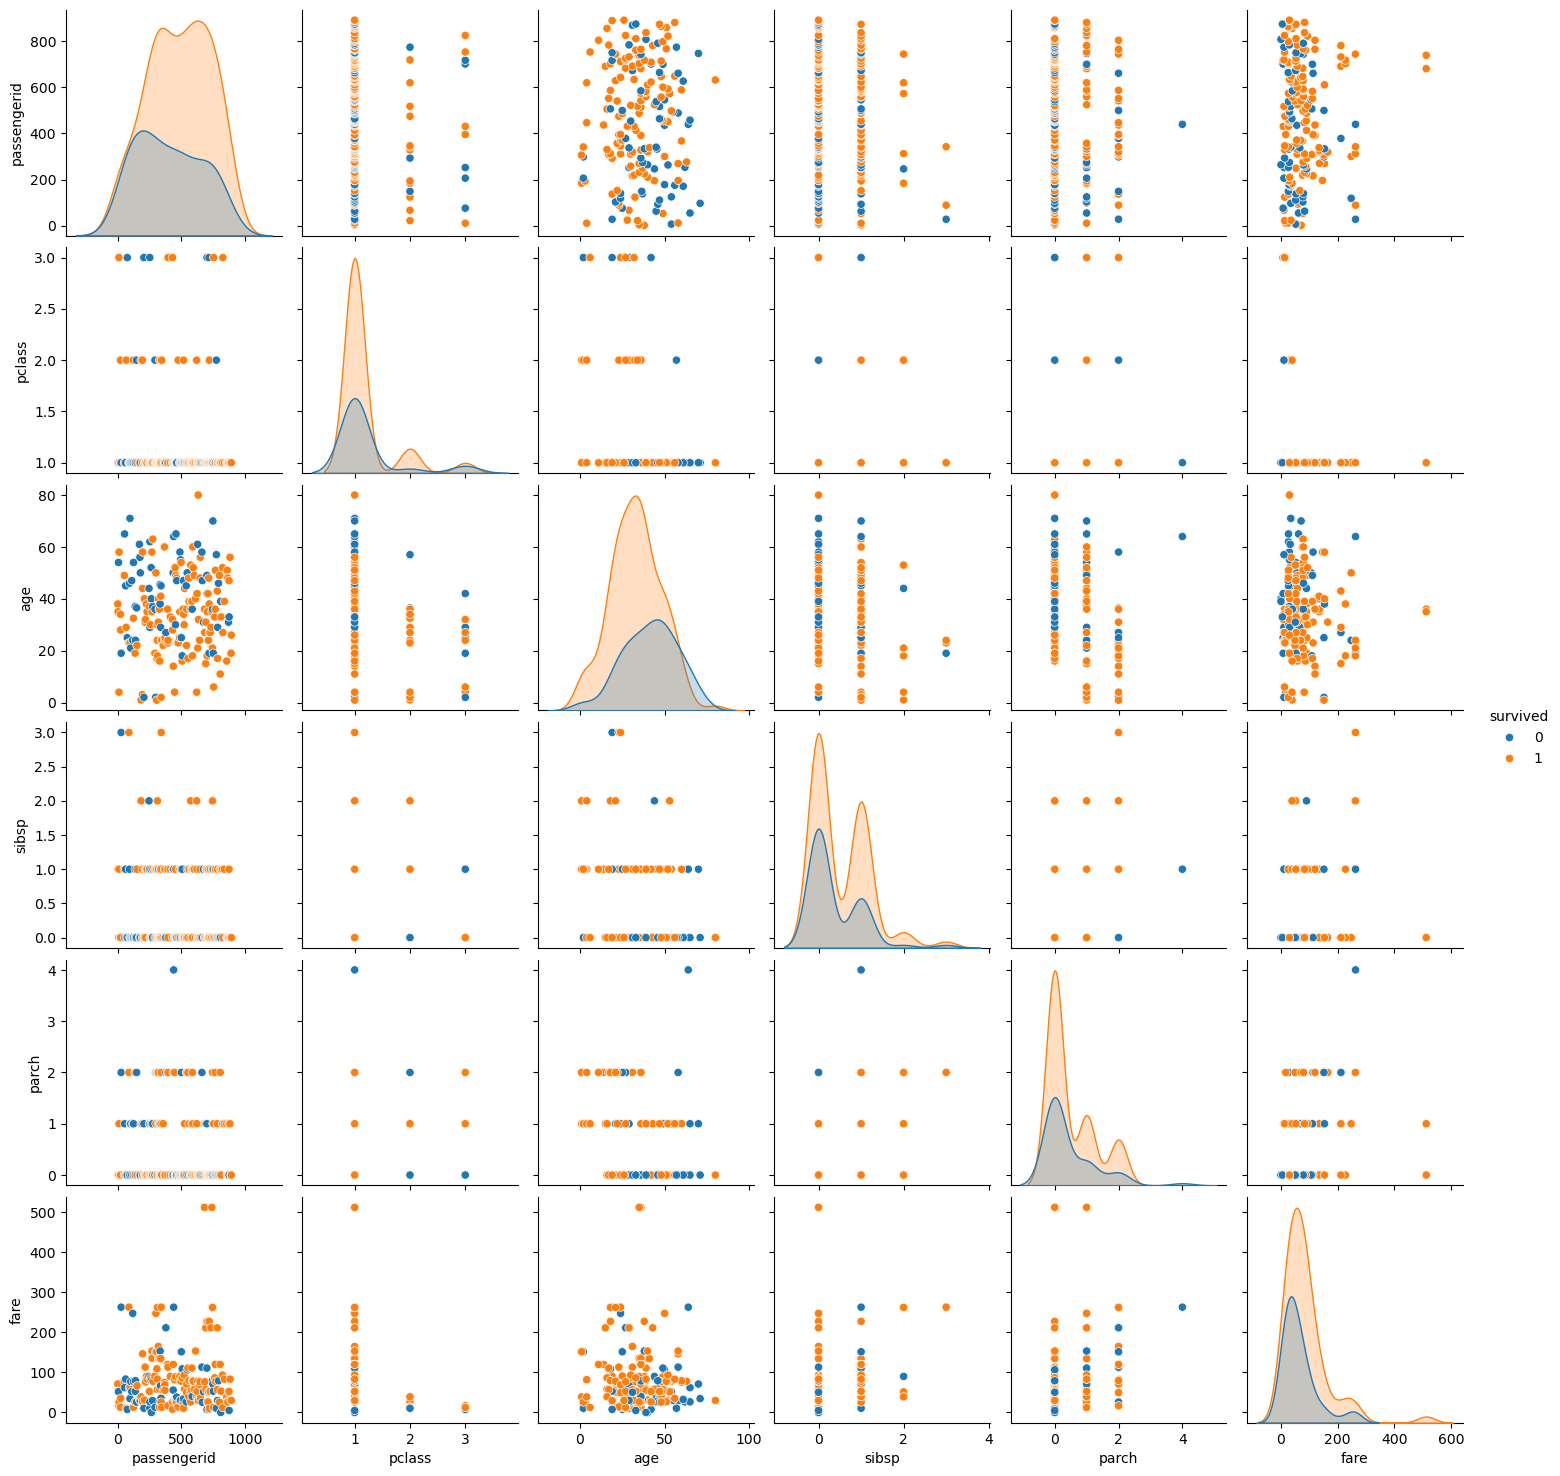

In [10]:
# Visualize all the data using sns.pairplot
sns.pairplot(titanic_data.dropna(), hue='survived')
plt.show()

In [11]:
# Check for null values
print("Missing values in each column:\n", titanic_data.isnull().sum())


Missing values in each column:
 passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [13]:
# Fill age null values with -999 without using inplace
titanic_data['age'] = titanic_data['age'].fillna(-999)


In [14]:
# Convert categorical features to numerical values
titanic_data = pd.get_dummies(titanic_data, drop_first=True)


In [15]:
# Create a list of features we are going to use
selected_features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']


In [16]:
# Define our `X` and `y`
X = titanic_data[selected_features]
y = titanic_data['survived']


In [17]:
# Split our data into trainig and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Length of our Training data:', len(X_train), 'Length of our Testing data:', len(X_test))

Length of our Training data: 712 Length of our Testing data: 179


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [18]:
# For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
# Fit our model with our training data
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [20]:
# Make predictions of our testing data
y_pred = model.predict(X_test)


In [ ]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)

# Calculate predicted probabilities for AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (survived=1)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score: %f" % auc)

Accuracy Score: 0.765363
Precision Score: 0.900000
Recall Score: 0.486486
F1 Score: 0.631579
AUC Score: 0.847362


# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [22]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring='accuracy', cv=5)

In [27]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [28]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print("Best parameters found:", grid_search_cv.best_params_)

Best parameters found: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [29]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
best_model = grid_search_cv.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)

# AUC Score
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score: %f" % auc)

Accuracy Score: 0.815642
Precision Score: 0.847458
Recall Score: 0.675676
F1 Score: 0.751880
AUC Score: 0.852252


In [30]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
5,0.746747,sex_male
0,0.253253,pclass
1,0.000000,age
2,0.000000,sibsp
3,0.000000,parch
4,0.000000,fare
6,0.000000,embarked_Q
7,0.000000,embarked_S


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [31]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
         }

In [32]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring='accuracy', cv=5)


In [33]:
# Fit GridSearchCV with the training data
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [34]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print("Best parameters found:", grid_search_rf.best_params_)




Best parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [35]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test data
y_pred_rf = best_rf_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)

# AUC Score
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba_rf)
print("AUC Score: %f" % auc)

Accuracy Score: 0.821229
Precision Score: 0.838710
Recall Score: 0.702703
F1 Score: 0.764706
AUC Score: 0.893822


In [36]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

sex_male      0.746747
pclass        0.253253
age           0.000000
sibsp         0.000000
parch         0.000000
fare          0.000000
embarked_Q    0.000000
embarked_S    0.000000
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [37]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [38]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 
X = df.drop(columns=['in_sf'])  # All columns except the target
y = df['in_sf']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring='accuracy', cv=5)

# Fit the GridSearchCV with training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search_rf.best_params_)

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)

# AUC Score
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score: %f" % auc)

# Calculate and display feature importances
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'feature_importance': best_rf_model.feature_importances_
}).sort_values('feature_importance', ascending=False)

# Display feature importances
print(feature_imp)


Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score: 0.909091
Precision Score: 0.898305
Recall Score: 0.946429
F1 Score: 0.921739
AUC Score: 0.964701
          feature  feature_importance
6       elevation            0.345448
5  price_per_sqft            0.240350
2           price            0.124601
3      year_built            0.107991
4            sqft            0.107182
0            beds            0.045622
1            bath            0.028807


# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [ ]:
df = pd.read_csv('data/adult_income.csv')
df.head()